In [1]:
#loading dummy data and demonstrating k means clustering
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling
import numpy as np


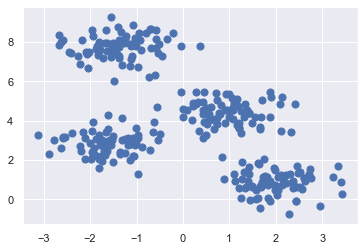

In [3]:
from sklearn.datasets.samples_generator import make_blobs
x,y_true = make_blobs(n_samples=300,centers = 4,cluster_std=0.60,random_state=0)
plt.scatter(x[:,0],x[:,1],s=50);


In [4]:
#central part of kmeans clustering

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4) #creating an instance of KMeans
#if having proper data pass to x.
kmeans.fit(x)
y_kmeans=kmeans.predict(x) #to which cluster which objects belong to

In [5]:
y_kmeans # for 300 objects cluster nos are given as 0,1,2,3

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

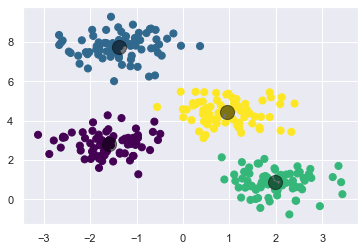

In [9]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(x,n_clusters,rseed=2):
    #randomly choose clusters 
    rng=np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i] #x[i] is an array which gives to the random centres of clusters
    
    while True:
        #2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(x,centers)
        
        #2b. Find new centers from means of points
        new_centers = np.array([x[labels == i].mean(0)for i in range(n_clusters)])
        
        #2c.Check for convergence
        if np.all(centers == new_centers):
                  break;
        centers=new_centers
    return centers,labels


centers,labels = find_clusters(x,4)
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s =50 , cmap='viridis')
plt.scatter(centers[:,0], centers[:,1],c='black' , s=200 , alpha=0.5);

                  